 # Chapter 10. Planetary Rings
 
 ## Action by Diana C. Zapata. University of Antioquia

In this notebook we will present part of the theoretical background of the chapter devoted to the *Planetary Ring Systems* and some mathematical and numerical results which are interested for the theory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
!pip install -q astroquery spiceypy pandas rebound

## Constants

In [54]:
from astropy import constants as c

In [58]:
c.au

<<class 'astropy.constants.iau2015.IAU2015'> name='Astronomical Unit' value=149597870700.0 uncertainty=0.0 unit='m' reference='IAU 2012 Resolution B2'>

 ## Section 10.1: Introduction

 ## Section 10.2: Planetary Ring Systems

### Data rings and moons

In [45]:
# Saturn
saturn_radius = 58232

In [46]:
from astroquery.jplhorizons import Horizons

In [47]:
import spiceypy as spy

In [59]:
tabla = Horizons(id="601", location="@699").elements().to_pandas()


<Quantity 1.86001919e+08 m>

       599 Jupiter

        501 Io          502 Europa      503 Ganymede    504 Callisto
        505 Amalthea    506 Himalia     507 Elara       508 Pasiphae
        509 Sinope      510 Lysithea    511 Carme       512 Ananke
        513 Leda        514 Thebe       515 Adrastea    516 Metis


        699 Saturn

        601 Mimas       602 Enceladus   603 Tethys      604 Dione
        605 Rhea        606 Titan       607 Hyperion    608 Iapetus
        609 Phoebe      610 Janus       611 Epimetheus  612 Helene
        613 Telesto     614 Calypso     615 Atlas       616 Prometheus
        617 Pandora     618 Pan         632 Methone     633 Pallene
        634 Polydeuces  635 Daphnis     649 Anthe       653 Aegaeon


        799 Uranus

        701 Ariel       702 Umbriel     703 Titania     704 Oberon
        705 Miranda     706 Cordelia    707 Ophelia     708 Bianca
        709 Cressida    710 Desdemona   711 Juliet      712 Portia
        713 Rosalind    714 Belinda     715 Puck


        899 Neptune

        801 Triton      802 Nereid      803 Naiad       804 Thalassa
        805 Despina     806 Galatea     807 Larissa     808 Proteus       599 Jupiter

        501 Io          502 Europa      503 Ganymede    504 Callisto
        505 Amalthea    506 Himalia     507 Elara       508 Pasiphae
        509 Sinope      510 Lysithea    511 Carme       512 Ananke
        513 Leda        514 Thebe       515 Adrastea    516 Metis


        699 Saturn

        601 Mimas       602 Enceladus   603 Tethys      604 Dione
        605 Rhea        606 Titan       607 Hyperion    608 Iapetus
        609 Phoebe      610 Janus       611 Epimetheus  612 Helene
        613 Telesto     614 Calypso     615 Atlas       616 Prometheus
        617 Pandora     618 Pan         632 Methone     633 Pallene
        634 Polydeuces  635 Daphnis     649 Anthe       653 Aegaeon


        799 Uranus

        701 Ariel       702 Umbriel     703 Titania     704 Oberon
        705 Miranda     706 Cordelia    707 Ophelia     708 Bianca
        709 Cressida    710 Desdemona   711 Juliet      712 Portia
        713 Rosalind    714 Belinda     715 Puck


        899 Neptune

        801 Triton      802 Nereid      803 Naiad       804 Thalassa
        805 Despina     806 Galatea     807 Larissa     808 Proteus

In [60]:
spy.furnsh("data/pck00011.tpc")

In [63]:
n,radii=spy.bodvrd("601","RADII",3)

In [65]:
radii.mean()

198.36666666666667

In [66]:
spy.furnsh("data/gm_de431.tpc")

In [73]:
n,dato=spy.bodvrd("6","GM",1)
gm=dato[0]
gm # En unidades km^3/s^2

37940585.2

In [75]:
mass_saturn=gm*(1e3)**3/c.G
mass_saturn.value

5.684578937117002e+26

### Plot of the systems

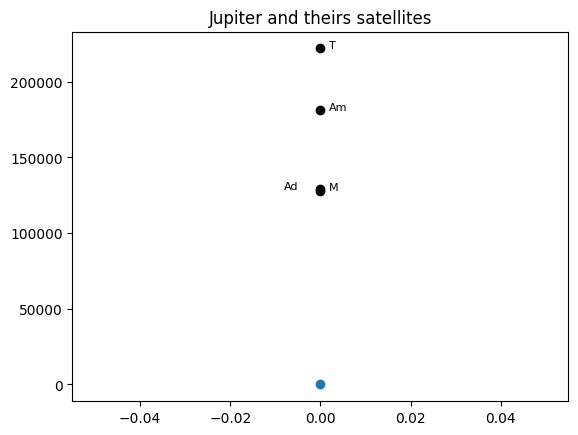

In [2]:
plt.title('Jupiter and theirs satellites')
plt.plot(0,0,'o') #Jupiter
plt.plot(0,127979,'o', color = 'black') #Metis
plt.text(0.002,127979,"M", fontsize=8, color='black')
plt.plot(0,128980,'o', color = 'black') #Adrastea
plt.text(-0.008,128980,"Ad", fontsize=8, color='black')
plt.plot(0,181300,'o', color = 'black') #Amalthea 
plt.text(0.002,181300,"Am", fontsize=8, color='black')
plt.plot(0,221900,'o', color = 'black') #Thebe 
plt.text(0.002,221900,"T", fontsize=8, color='black')
plt.show()

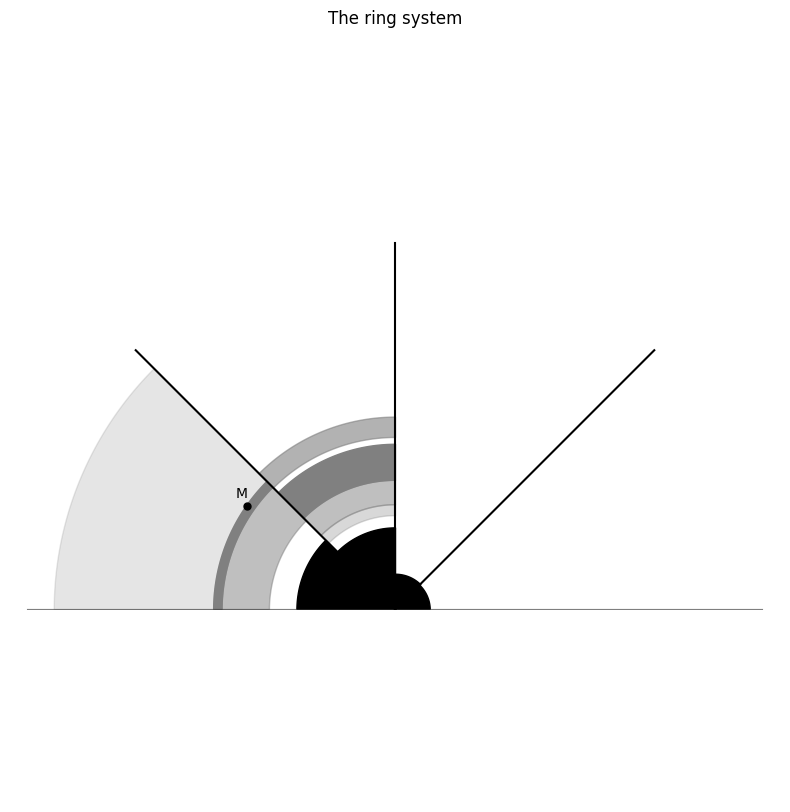

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar = True)
plt.title("The ring system")


# Plot of Jupiter

theta = np.linspace(3 * np.pi/4,np.pi, 100)

jupiter_radius = 69911
ax.fill_between(theta, 0, jupiter_radius, color = 'black' )

# Plot of first ring system
halo_inner = 89400
halo_outer = 123000
ax.fill_between(theta, halo_inner, halo_outer, color = 'gray', alpha = 0.5)

# Plot of second ring system
main_inner = 123000
main_outer = 128940
ax.fill_between(theta, main_inner, main_outer, color = 'gray', alpha = 1)

# Plot of third ring system
gossamer_inner = 128940
gossamer_outer = 242000
ax.fill_between(theta, gossamer_inner, gossamer_outer, color = 'gray', alpha = 0.2)

# Plot satellites
metis = 127979
ax.plot(145*np.pi/180,metis,"o",color="black",markersize=5)
plt.text(145*np.pi/180,137979,"M", fontsize=10, color='black')

adrastea = 127979
ax.plot(145*np.pi/180,metis,"o",color="black",markersize=5)
plt.text(145*np.pi/180,137979,"M", fontsize=10, color='black')


# Plot of Saturn
theta = np.linspace(np.pi/2, 3 * np.pi/4, 100)

saturn_radius = 58232
ax.fill_between(theta, 0, saturn_radius, color = 'black')

# Plot of D ring system
D_inner = 66900
D_outer = 74658
ax.fill_between(theta, D_inner, D_outer, color = 'gray', alpha = 0.3)

# Plot of C ring system
C_inner = 74658
C_outer = 91975
ax.fill_between(theta, C_inner, C_outer, color = 'gray', alpha = 0.5)

# Plot of B ring system
B_inner = 91975
B_outer = 117507
ax.fill_between(theta, B_inner, B_outer, color = 'gray', alpha = 1)

# Plot of A ring system
A_inner = 122340
A_outer = 136780
ax.fill_between(theta, A_inner, A_outer, color = 'gray', alpha = 0.6)



# Plot of Uranus
theta = np.linspace(np.pi/2, np.pi/4, 100)

uranus_radius = 25362
ax.fill_between(theta, 0, uranus_radius, color = 'black')



# Plot of Neptune
theta = np.linspace(0, np.pi/4, 100)

uranus_radius = 24622
ax.fill_between(theta, 0, uranus_radius, color = 'black')


for i in [0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi]:
        rad = i
        ax.plot([rad,rad], [0,260000], color="black", linewidth=1.5)
               
        
        
ax.set_thetamin(0)
ax.set_thetamax(180)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

 ### Section 10.2.1: The Rings of Jupiter

 ### Section 10.2.2: The Rings of Saturn

 ### Section 10.2.3: The Rings of Uranus

 ### Section 10.2.4: The Rings of Neptune

 ### Section 10.2.5: Rings and Satellites

 ## Section 10.3: Resonances in Rings

### Section 10.3.1: Perturbations in Semi-major Axis and Corotation Resonances

### Section 10.3.2: Perturbations in Eccentricity and Lindblad Resonances

### Section 10.3.3: Perturbations in Inclination and Vertical Resonances

### Section 10.3.4: Locations of Resonances

## Section 10.4: Density Waves and Bending Waves

## Section 10.5: Narrow Rings and Sharp Edges

### Section 10.5.1: Spreading Timescales